Imports

In [1]:
import tensorflow as tf
import os
from PIL import Image
import numpy as np
from tensorflow.keras import layers, preprocessing, Sequential
import matplotlib.pyplot as plt


In [2]:
cd ../../..


/Users/rhys/Desktop


In [3]:
ls

58ca8aa2-e502-487d-877c-5f77b2e0b24e-1.png
58ca8aa2-e502-487d-877c-5f77b2e0b24e.png
Big Data/
Big Data Coursework.cwh
Big Data Coursework.pdf
Big Data Learning/
C++/
Coursework images/
Exported Items.bib
Haskell/
IMG_0961.HEIC
Improving Diagnosis in Health Care.pdf
Kaggle Titanic Dataset/
Maths Lectures/
NextJS/
Python/
Report/
Screen Recording 2025-05-21 at 00.19.40.mov
Screenshot 2025-05-10 at 15.25.06.png
Screenshot 2025-05-21 at 00.06.16.png
Screenshot 2025-05-21 at 01.12.23.png
Tauari/
Web Programming/
datasets/
expo/
fig_confusion_matrix.png
fig_learning_curve.png
fig_per_class_f1.png
graph theory/
hjbblblbb.cwh
index.html
model_arch.png
modelamatrix.png
rhyssocial/
test/
testpy.py


Data Loading

In [4]:
# data_dir = '/content/drive/MyDrive/datasets/BrainTumorDS'
test_dir = '/Users/rhys/Desktop/datasets/BrainTumorDS/Testing'
train_dir = '/Users/rhys/Desktop/datasets/BrainTumorDS/Training'


In [5]:
# import numpy as np
# from skimage import io
# from skimage.color import rgb2gray
# from skimage.filters import threshold_otsu
# from skimage.morphology import remove_small_objects, binary_closing, disk
# from skimage.measure import label, regionprops
# from skimage.morphology import remove_small_objects
# from PIL import Image
# import os

# test_dir_backup =  '/Users/rhys/Desktop/datasets/BrainTumorDS copy/Testing'
# target_dir = '/Users/rhys/Desktop/datasets/BrainTumourPreprocessed'


# def skull_strip(image):
#     gray = rgb2gray(image)
#     thresh = threshold_otsu(gray)
#     mask = gray > thresh

#     # Label connected regions
#     labeled_mask = label(mask)
#     regions = regionprops(labeled_mask)

#     # Get the largest region (assumed to be brain)
#     if not regions:
#         return image  # fallback if nothing found

#     largest_region = max(regions, key=lambda r: r.area)
#     brain_mask = labeled_mask == largest_region.label

#     # Clean mask
#     brain_mask = remove_small_objects(brain_mask, min_size=500)

#     # Apply mask to RGB image
#     masked_img = np.zeros_like(image)
#     for i in range(3):
#         masked_img[..., i] = image[..., i] * brain_mask
#     return masked_img

# def process_images(source_dir):
#     for category in os.listdir(source_dir):
#         if category.startswith('.'):
#             continue
#         category_path = os.path.join(source_dir, category)
#         target_category_path = os.path.join(target_dir, category)
#         os.makedirs(target_category_path, exist_ok=True)

#         for filename in os.listdir(category_path):
#             if filename.startswith('.'):
#                 continue
#             file_path = os.path.join(category_path, filename)
#             target_file_path = os.path.join(target_category_path, filename)

#             try:
#                 image = io.imread(file_path)
#                 processed = skull_strip(image)
#                 processed_pil = Image.fromarray((processed * 255).astype(np.uint8))
#                 processed_pil.save(target_file_path)
#             except Exception as e:
#                 print(f"Error processing {file_path}: {e}")

# process_images(test_dir_backup)

Filter out blurry and poor quality images

In [5]:
batchSize = 32
imgSize = 256

In [6]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    batch_size= batchSize,
    image_size=(imgSize,imgSize),
    label_mode = 'categorical',
    color_mode = 'grayscale',
    subset = 'training',
    shuffle = True,
    validation_split = 0.2,
    seed = 123
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    batch_size= batchSize,
    image_size=(imgSize,imgSize),
    label_mode = 'categorical',
    color_mode = 'grayscale',
    shuffle = True,
    seed = 123
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    batch_size= batchSize,
    image_size=(imgSize,imgSize),
    label_mode = 'categorical',
    color_mode = 'grayscale',
    subset = 'validation',
    shuffle = True,
    validation_split = 0.2,
    seed = 123
)

Found 2870 files belonging to 4 classes.
Using 2296 files for training.
Found 394 files belonging to 4 classes.
Found 2870 files belonging to 4 classes.
Using 574 files for validation.


2025-05-27 16:12:01.544587: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2025-05-27 16:12:01.544617: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-05-27 16:12:01.544626: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-05-27 16:12:01.544642: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-05-27 16:12:01.544654: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Pre-Processing

In [7]:
class_names = train_ds.class_names
print(class_names)

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


In [8]:
data_augmentation = tf.keras.Sequential(
  [
     layers.RandomFlip("horizontal",
     input_shape=(imgSize,imgSize,1)),
    layers.RandomRotation(0.4),
  ]
)

/opt/homebrew/anaconda3/lib/python3.12/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2025-05-27 16:12:09.457586: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


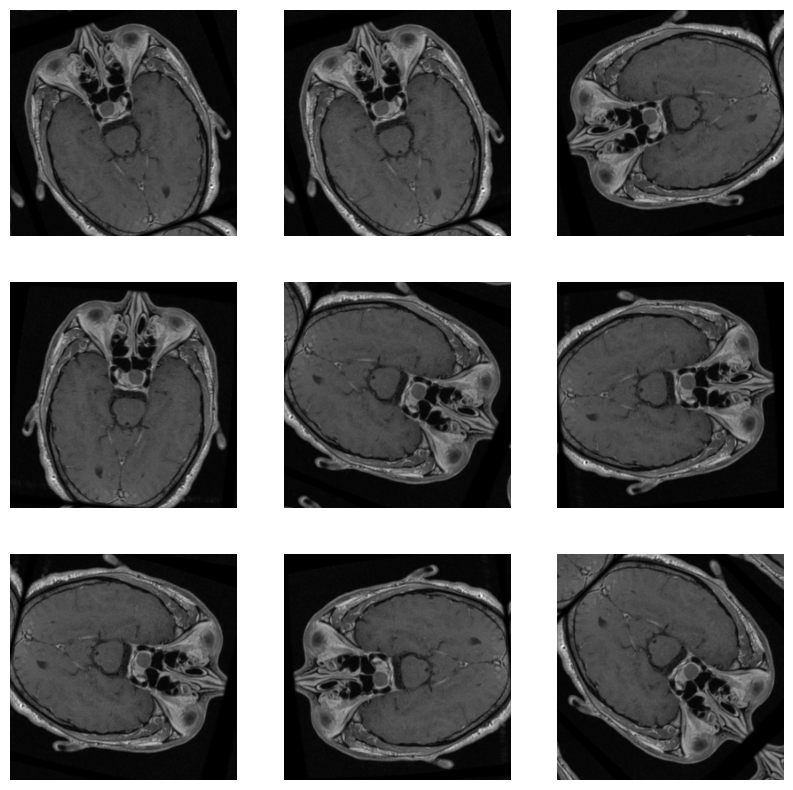

In [9]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[1].numpy(), cmap='gray')
    plt.axis("off")

2025-05-17 09:13:13.056454: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


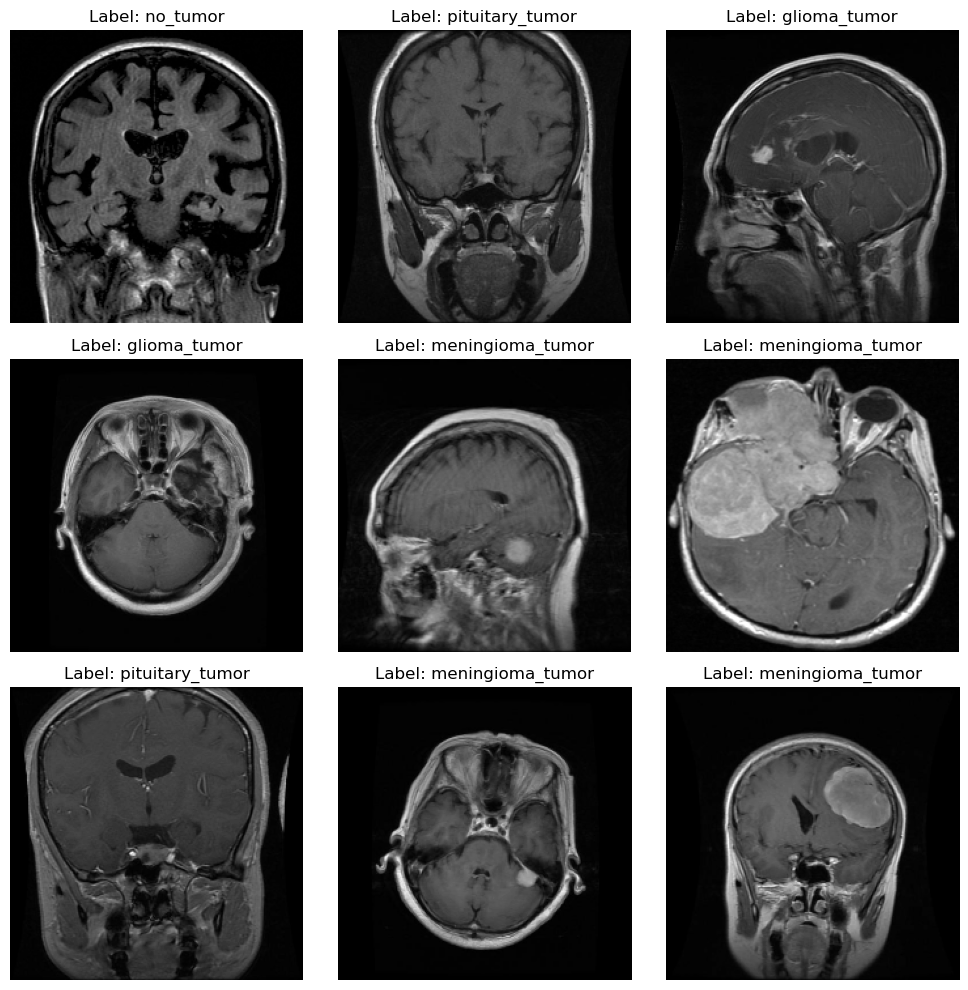

In [ ]:
# # Step 4: Visualize a batch of images
# class_names = [str(i) for i in range(10)]

# plt.figure(figsize=(10, 10))
# for images, labels in train_ds.take(1):  # take one batch
#     for i in range(9):
#         ax = plt.subplot(3, 3, i + 1)
#         plt.imshow(tf.squeeze(images[i]), cmap='gray')  
#         plt.title(f"Label: {train_ds.class_names[tf.argmax(labels[i]).numpy()]}")
#         plt.axis("off")
# plt.tight_layout()
# plt.show()

In [ ]:
# labels[10]

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0., 0., 0., 1.], dtype=float32)>

tf.Tensor([0. 0. 0. 1.], shape=(4,), dtype=float32)


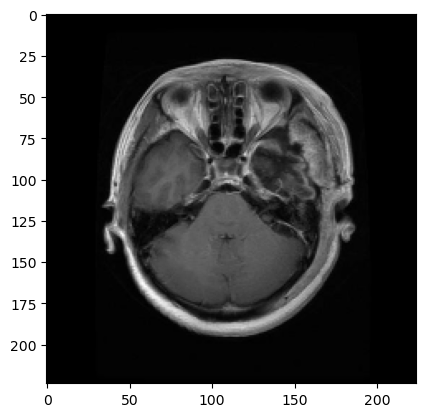

In [ ]:
# plt.imshow(images[3], cmap='gray')
# print(labels[1])

In [10]:
#Model A
num_classes = len(class_names)

model = tf.keras.models.Sequential([
  data_augmentation,
  tf.keras.layers.Rescaling(1./255, input_shape=(imgSize, imgSize, 1)),
  tf.keras.layers.Conv2D(30,(5,5), 1, padding='valid', activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(16,(5,5), 1, padding='valid', activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Flatten(),

  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  
  tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [10]:
#Model B
num_classes = len(class_names)

model = tf.keras.models.Sequential([
  data_augmentation,
  tf.keras.layers.Rescaling(1./255, input_shape=(imgSize, imgSize, 1)),
  tf.keras.layers.Conv2D(64, (3,3), 1, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32,(3,3), 1, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(16,(3,3), 1, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),

  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
 
  tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [ ]:
#make a pretrained model that takes in a grayscale image
# base_model = tf.keras.applications.VGG16(
#     include_top=False,
#     weights=None,
#     input_shape=(imgSize, imgSize, 3),
#     pooling='avg'
# )
# base_model.trainable = False
# model = Sequential([
#     base_model,
#     layers.Flatten(),
#     layers.Dense(128, activation='relu'),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(num_classes, activation='softmax')
# ])

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 256, 256, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,097,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,129,524 (8.12 MB)

 Trainable params: 2,129,524 (8.12 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# from tensorflow.keras.utils import plot_model

# plot_model(
#     model,
#     show_shapes=True,           # output tensor shapes
#     show_layer_activations=True,
#     to_file='model_arch.png'    # also saved to disk
# )                               # renders inline in most notebooks


OSError: [Errno 30] Read-only file system: 'model_arch.png'

In [13]:
epochs = 25
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/25


2025-05-27 16:12:30.155157: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2025-05-27 16:12:30.160720: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


72/72 ━━━━━━━━━━━━━━━━━━━━ 12s 140ms/step - accuracy: 0.4439 - loss: 1.2226 - val_accuracy: 0.5627 - val_loss: 1.0076
Epoch 2/25
72/72 ━━━━━━━━━━━━━━━━━━━━ 10s 137ms/step - accuracy: 0.5619 - loss: 1.0315 - val_accuracy: 0.6080 - val_loss: 0.9030
Epoch 3/25
72/72 ━━━━━━━━━━━━━━━━━━━━ 10s 139ms/step - accuracy: 0.6367 - loss: 0.8664 - val_accuracy: 0.6707 - val_loss: 0.7755
Epoch 4/25
72/72 ━━━━━━━━━━━━━━━━━━━━ 10s 135ms/step - accuracy: 0.6673 - loss: 0.8033 - val_accuracy: 0.6533 - val_loss: 0.7889
Epoch 5/25
72/72 ━━━━━━━━━━━━━━━━━━━━ 10s 133ms/step - accuracy: 0.6773 - loss: 0.7894 - val_accuracy: 0.7038 - val_loss: 0.6948
Epoch 6/25
72/72 ━━━━━━━━━━━━━━━━━━━━ 10s 135ms/step - accuracy: 0.7139 - loss: 0.6866 - val_accuracy: 0.7247 - val_loss: 0.6466
Epoch 7/25
72/72 ━━━━━━━━━━━━━━━━━━━━ 10s 135ms/step - accuracy: 0.6981 - loss: 0.6900 - val_accuracy: 0.7282 - val_loss: 0.6825
Epoch 8/25
72/72 ━━━━━━━━━━━━━━━━━━━━ 10s 135ms/step - accuracy: 0.7269 - loss: 0.6603 - val_accuracy: 0.730

In [ ]:
# epochs = 25
# early_stopping = tf.keras.callbacks.EarlyStopping(
#     monitor='accuracy',
#     patience=3,
#     restore_best_weights=True
# )
# history = model.fit(
#   train_ds,
#   validation_data=val_ds,
#   epochs=epochs,
#   callbacks=[early_stopping]
# )

ValueError: x and y must have same first dimension, but have shapes (25,) and (8,)

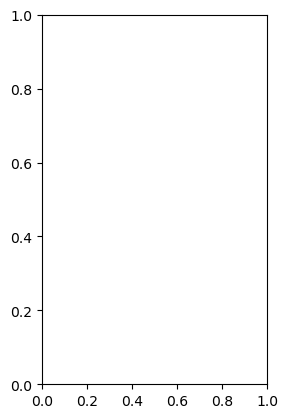

In [ ]:
# Adam optimizer 50 epochs - 0.92 acc , 0.87 val_acc
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

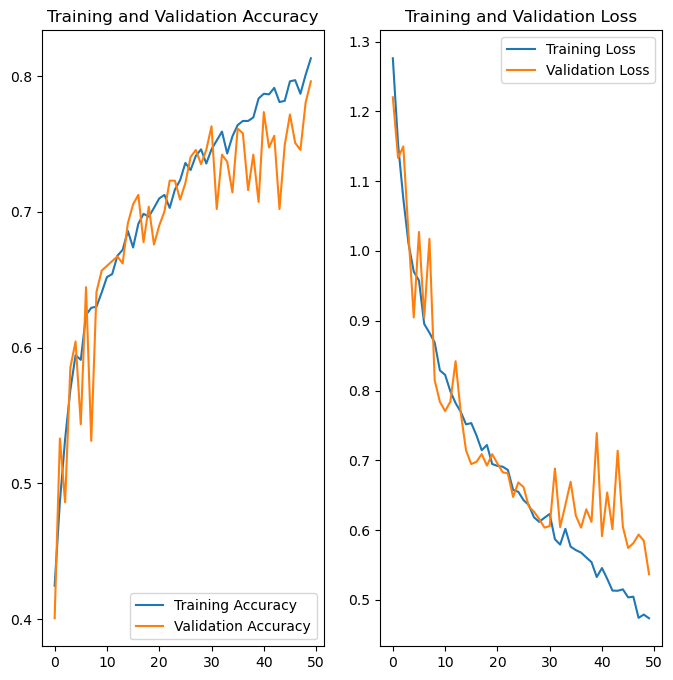

In [16]:
#SGD optimizer 50 epochs
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

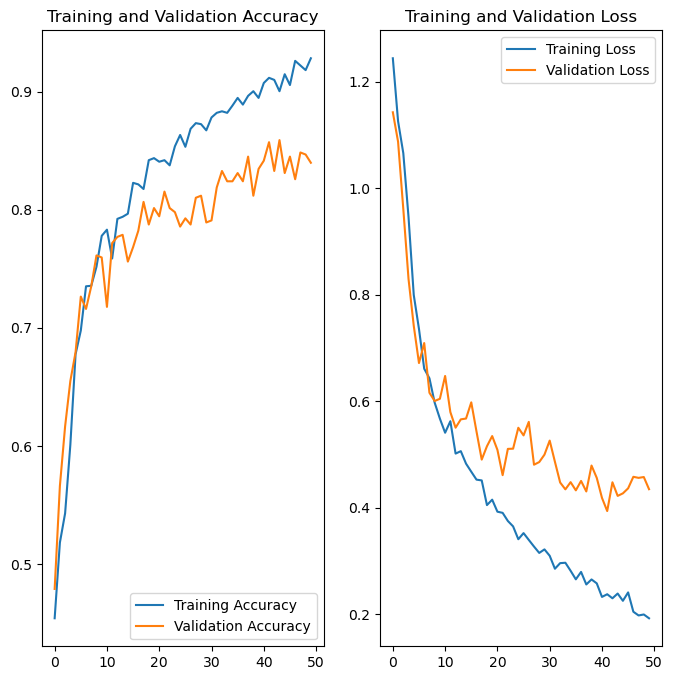

In [28]:
#AdamW optimizer 50 epochs

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

2025-05-27 12:27:07.840912: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-05-27 12:27:07.916938: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


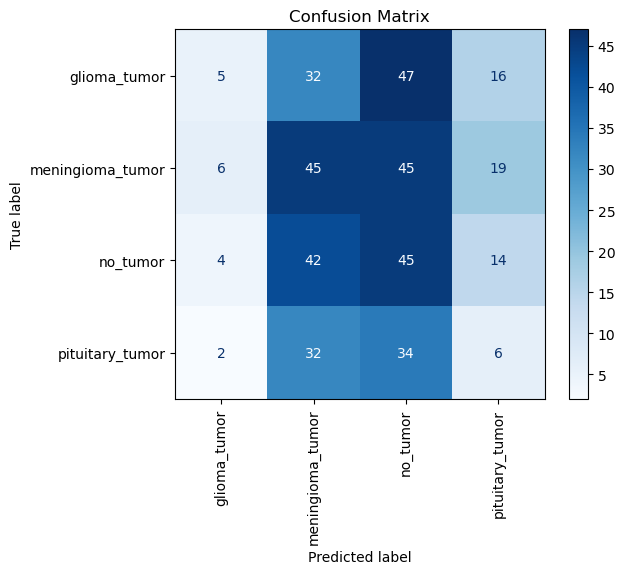

In [16]:
#Model A

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get the true labels and predicted labels from the test dataset
y_true = np.concatenate([labels for images, labels in test_ds], axis=0)
y_true_labels = np.argmax(y_true, axis=1)
y_pred_probs = model.predict(test_ds)
y_pred_labels = np.argmax(y_pred_probs, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

# Display the confusion matrix with rotated x-axis labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.title('Confusion Matrix')
plt.show()

2025-05-27 15:16:37.927631: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-05-27 15:16:38.047404: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


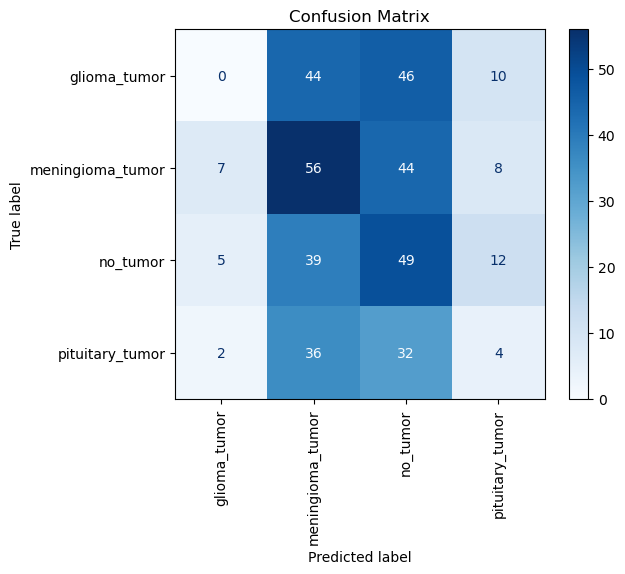

In [14]:
#Model B

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get the true labels and predicted labels from the test dataset
y_true = np.concatenate([labels for images, labels in test_ds], axis=0)
y_true_labels = np.argmax(y_true, axis=1)
y_pred_probs = model.predict(test_ds)
y_pred_labels = np.argmax(y_pred_probs, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

# Display the confusion matrix with rotated x-axis labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.title('Confusion Matrix')
plt.show()

2025-05-27 12:47:21.924334: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


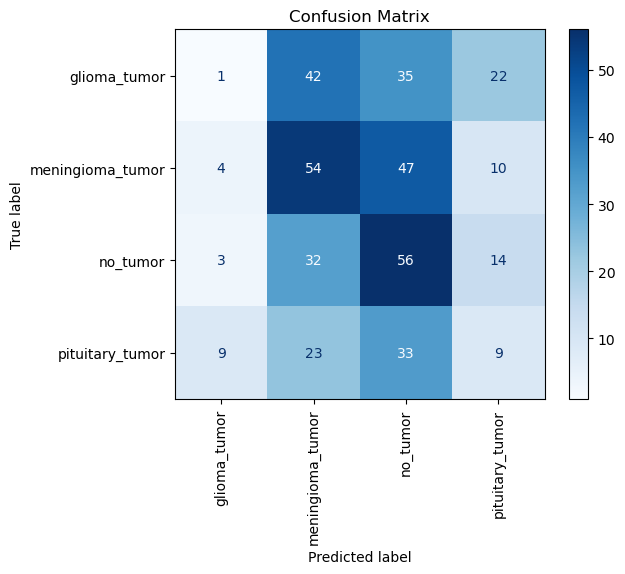

Precision: 0.23
Recall: 0.28
F1 Score: 0.24
Macro Specificity: 0.76


In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score

# Get the true labels and predicted labels from the test dataset
y_true = np.concatenate([labels for images, labels in test_ds], axis=0)
y_true_labels = np.argmax(y_true, axis=1)
y_pred_probs = model.predict(test_ds)
y_pred_labels = np.argmax(y_pred_probs, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.title('Confusion Matrix')
plt.show()

# Compute precision, recall, and F1 score
precision = precision_score(y_true_labels, y_pred_labels, average='macro')
recall = recall_score(y_true_labels, y_pred_labels, average='macro')
f1 = f1_score(y_true_labels, y_pred_labels, average='macro')

print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))

# Compute specificity for each class and macro specificity
specificities = []
for i in range(len(class_names)):
    # True negatives: all elements not in row i and not in column i
    tn = cm.sum() - (cm[i, :].sum() + cm[:, i].sum() - cm[i, i])
    # False positives: all instances predicted as class i but not true class i
    fp = cm[:, i].sum() - cm[i, i]
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    specificities.append(specificity)
    
macro_specificity = np.mean(specificities)
print("Macro Specificity: {:.2f}".format(macro_specificity))

2025-05-27 15:55:09.963022: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-05-27 15:55:10.025281: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


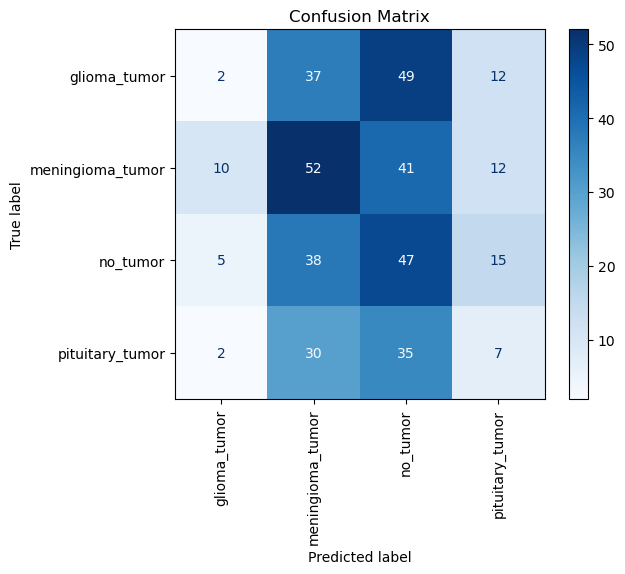

Precision: 0.22
Recall: 0.25
F1 Score: 0.22
Macro Specificity: 0.75


In [14]:
#model a 50 epoochs

#
#
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score

# Get the true labels and predicted labels from the test dataset
y_true = np.concatenate([labels for images, labels in test_ds], axis=0)
y_true_labels = np.argmax(y_true, axis=1)
y_pred_probs = model.predict(test_ds)
y_pred_labels = np.argmax(y_pred_probs, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.title('Confusion Matrix')
plt.show()

# Compute precision, recall, and F1 score
precision = precision_score(y_true_labels, y_pred_labels, average='macro')
recall = recall_score(y_true_labels, y_pred_labels, average='macro')
f1 = f1_score(y_true_labels, y_pred_labels, average='macro')

print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))

# Compute specificity for each class and macro specificity
specificities = []
for i in range(len(class_names)):
    # True negatives: all elements not in row i and not in column i
    tn = cm.sum() - (cm[i, :].sum() + cm[:, i].sum() - cm[i, i])
    # False positives: all instances predicted as class i but not true class i
    fp = cm[:, i].sum() - cm[i, i]
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    specificities.append(specificity)
    
macro_specificity = np.mean(specificities)
print("Macro Specificity: {:.2f}".format(macro_specificity))

2025-05-27 16:09:52.671101: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-05-27 16:09:52.766883: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


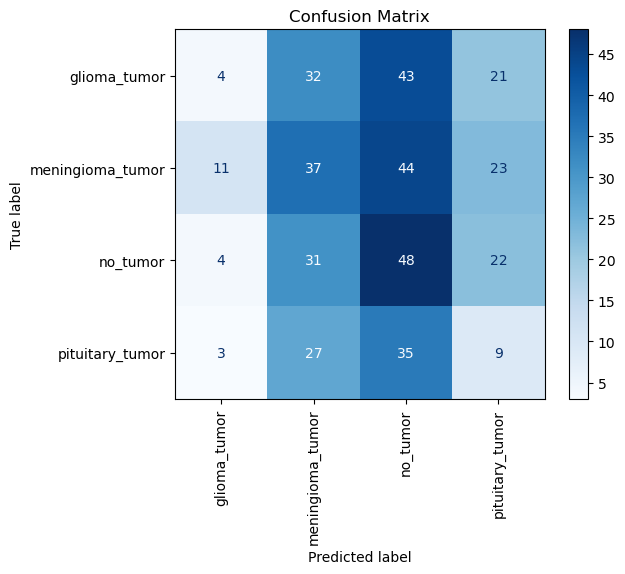

Precision: 0.22
Recall: 0.24
F1 Score: 0.21
Macro Specificity: 0.75


In [15]:
#model b 50 epoochs

#
#
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score

# Get the true labels and predicted labels from the test dataset
y_true = np.concatenate([labels for images, labels in test_ds], axis=0)
y_true_labels = np.argmax(y_true, axis=1)
y_pred_probs = model.predict(test_ds)
y_pred_labels = np.argmax(y_pred_probs, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.title('Confusion Matrix')
plt.show()

# Compute precision, recall, and F1 score
precision = precision_score(y_true_labels, y_pred_labels, average='macro')
recall = recall_score(y_true_labels, y_pred_labels, average='macro')
f1 = f1_score(y_true_labels, y_pred_labels, average='macro')

print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))

# Compute specificity for each class and macro specificity
specificities = []
for i in range(len(class_names)):
    # True negatives: all elements not in row i and not in column i
    tn = cm.sum() - (cm[i, :].sum() + cm[:, i].sum() - cm[i, i])
    # False positives: all instances predicted as class i but not true class i
    fp = cm[:, i].sum() - cm[i, i]
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    specificities.append(specificity)
    
macro_specificity = np.mean(specificities)
print("Macro Specificity: {:.2f}".format(macro_specificity))

2025-05-27 16:19:07.157389: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


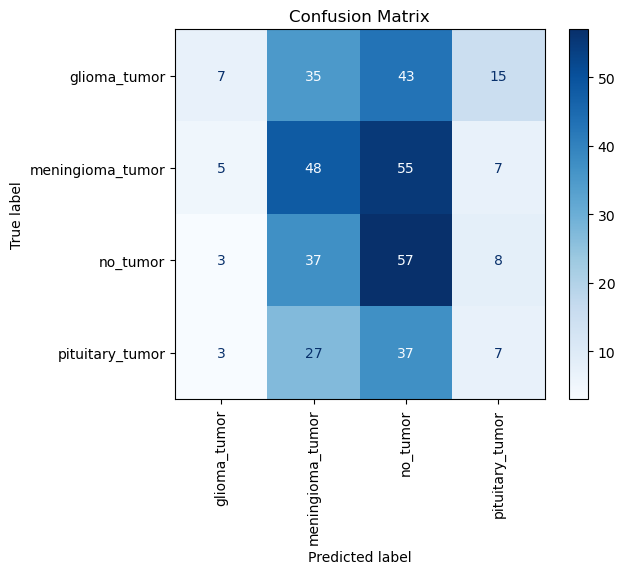

Precision: 0.30
Recall: 0.28
F1 Score: 0.25
Macro Specificity: 0.76


In [15]:
#model b 25 epoochs

#
#
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score

# Get the true labels and predicted labels from the test dataset
y_true = np.concatenate([labels for images, labels in test_ds], axis=0)
y_true_labels = np.argmax(y_true, axis=1)
y_pred_probs = model.predict(test_ds)
y_pred_labels = np.argmax(y_pred_probs, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.title('Confusion Matrix')
plt.show()

# Compute precision, recall, and F1 score
precision = precision_score(y_true_labels, y_pred_labels, average='macro')
recall = recall_score(y_true_labels, y_pred_labels, average='macro')
f1 = f1_score(y_true_labels, y_pred_labels, average='macro')

print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))

# Compute specificity for each class and macro specificity
specificities = []
for i in range(len(class_names)):
    # True negatives: all elements not in row i and not in column i
    tn = cm.sum() - (cm[i, :].sum() + cm[:, i].sum() - cm[i, i])
    # False positives: all instances predicted as class i but not true class i
    fp = cm[:, i].sum() - cm[i, i]
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    specificities.append(specificity)
    
macro_specificity = np.mean(specificities)
print("Macro Specificity: {:.2f}".format(macro_specificity))